In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../data/realKnownCause/machine_temperature_system_failure.csv")
df.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [15]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values(["timestamp"])
df = df.set_index("timestamp")
df.head()

,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836


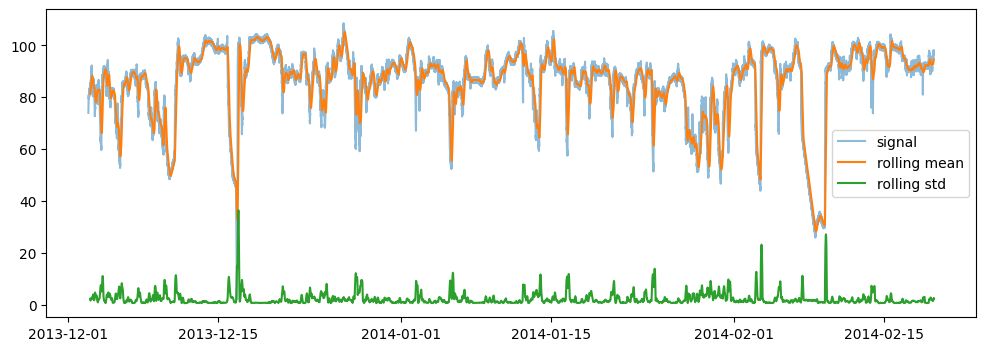

In [17]:
rolling_mean = df["value"].rolling(window=50).mean()
rolling_std = df["value"].rolling(window=50).std()
plt.figure(figsize=(12,4))
plt.plot(df["value"], alpha=0.5, label="signal")
plt.plot(rolling_mean, label="rolling mean")
plt.plot(rolling_std, label="rolling std")
plt.legend()
plt.show()

In [19]:
df["z_score"] = (df["value"] - rolling_mean) / rolling_std
df["anomaly"] = df["z_score"].abs() > 3
anomalies = df[df["anomaly"]]

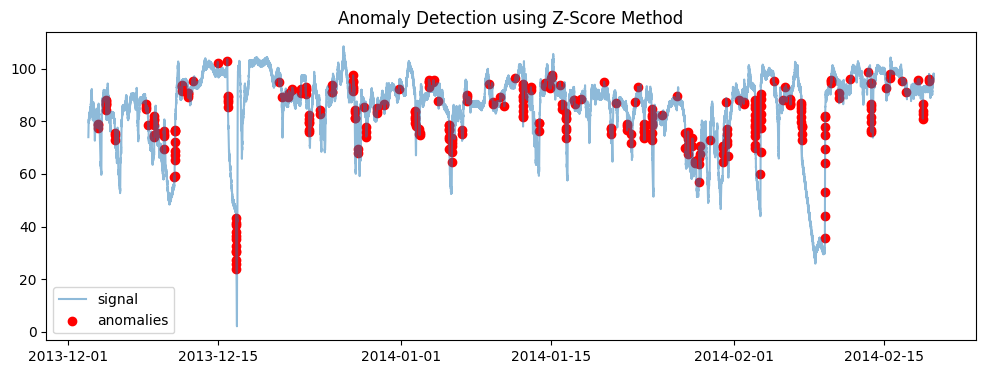

In [22]:
plt.figure(figsize=(12,4))
plt.plot(df["value"], alpha=0.5, label="signal")
plt.scatter(anomalies.index, anomalies["value"], color='red', label="anomalies")
plt.title("Anomaly Detection using Z-Score Method")
plt.legend()
plt.show()

In [28]:
from anomaly_detection.core.data_utils import load_timeseries
from anomaly_detection.core.models import IsoForestDetector, rolling_zscore

In [25]:
df = load_timeseries("../data/realKnownCause/machine_temperature_system_failure.csv")
series = df["value"]
iso = IsoForestDetector(contamination=0.01)
iso.fit(series)
iso_anomalies = iso.predict(series)

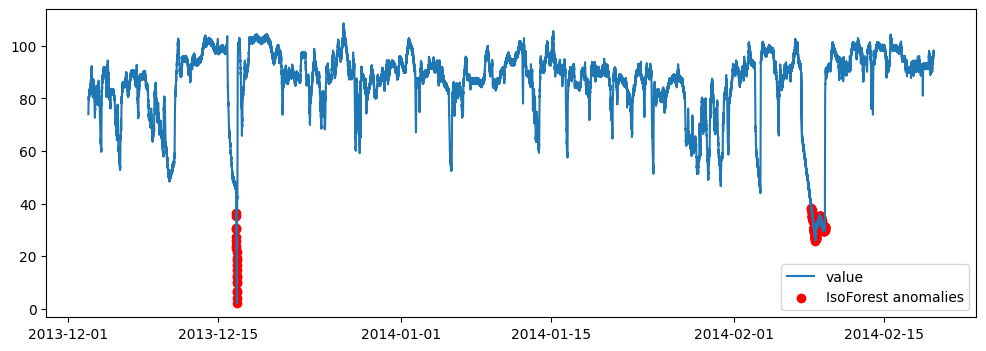

In [26]:
plt.figure(figsize=(12,4))
plt.plot(series.index, series.values, label="value")
plt.scatter(series.index[iso_anomalies], series.values[iso_anomalies], color='red', label="IsoForest anomalies")
plt.legend()
plt.show()

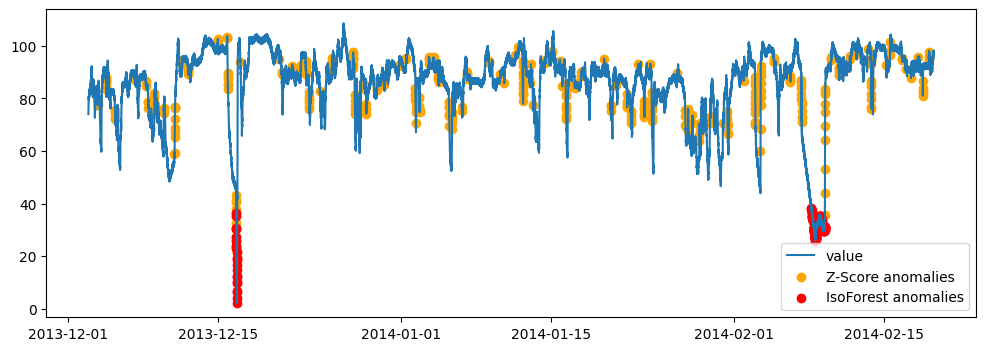

In [29]:
z, z_anoms = rolling_zscore(series)
plt.figure(figsize=(12,4))
plt.plot(series.index, series.values, label="value")
plt.scatter(series.index[z_anoms], series.values[z_anoms], color='orange', label="Z-Score anomalies")
plt.scatter(series.index[iso_anomalies], series.values[iso_anomalies], color='red', label="IsoForest anomalies")
plt.legend()
plt.show()